Import the required libraries 

In [1258]:
import json
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#ignore warnings generated by the notebook
import warnings
warnings.filterwarnings('ignore')

Reading in the datasets for the project using pandas which have previosuly been downloaded to the notebook.


Adding additional columns to the dataframe:

Population - API call;

Deprivation Index - Merging two dataframes together

In [1259]:
df= pd.read_csv("dataset.csv")
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park


API call for Population Count to be added to the dataframe


In [1260]:
def get_Pop(Latitude, Longitude):
    ''' Takes in the longtitude and latitude and returns the population taken from the 2018 census'''
    
    #URL already includes the required json formatting
    url = "https://koordinates.com/services/query/v1/vector.json"

    params = {
        'key' : 'beb9f0aa84c84614a9d52184d993107a',
        'layer' : '104612',
        'x' : Longitude,
        'y' : Latitude
    }

    response = requests.get(url, params = params)
    
    if response.status_code != 200:
        return pd.Series({'Population': response.status_code})
    
    pop = response.json()['vectorQuery']['layers']['104612']['features'][0]['properties']['C18_CURPop']
    
    return pd.Series({'Population' : pop})

In [1261]:
''' Previous code to add the population column to the dataframe using the defined API call method'''
#df['Population'] = df.apply(lambda x : get_Pop(x['Latitude'], x['Longitude']), axis=1)''''''
#df.head()

' Previous code to add the population column to the dataframe using the defined API call method'

In [1262]:
''' Saves the dataframe to the notebook'''
#df.to_csv('dataset_pop.csv', index=False)

' Saves the dataframe to the notebook'

In [1263]:
df = df= pd.read_csv("dataset_pop.csv")
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231


In [1264]:
index = pd.read_excel('deprivationIndex.xlsx', sheet_name = None)
index

OrderedDict([('NZDep2018_SA1',
                     SA12018_code  NZDep2018  NZDep2018_Score  URPopnSA1_2018  SA22018_code  \
              0           7000000       10.0           1245.0             141        100100   
              1           7000001       10.0           1245.0             114        100100   
              2           7000002        NaN              NaN               0        100300   
              3           7000003       10.0           1207.0             225        100100   
              4           7000004        9.0           1093.0             138        100100   
              5           7000005       10.0           1253.0             174        100100   
              6           7000006        9.0           1093.0             105        100100   
              7           7000007        9.0           1072.0             240        100100   
              8           7000008        8.0           1044.0             228        100100   
              9    

In [1265]:
#Merging the two dataframes together using the SA1 area codes as a key to link the correct data together
dataframe = df.merge(index['NZDep2018_SA1'], left_on='SA1', right_on='SA12018_code')
dataframe.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,...,50-59 years,60+ years,Suburbs,Population,SA12018_code,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,...,24,21,Manurewa,174,7009770,6.0,997.0,174,159600,Hillpark North
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,...,15,30,Karaka,129,7009991,1.0,881.0,129,162500,Hingaia
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,...,15,30,Karaka,129,7009991,1.0,881.0,129,162500,Hingaia
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,...,12,15,Onehunga,120,7007871,2.0,908.0,120,144300,Onehunga North
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,...,21,33,Clover Park,231,7008902,9.0,1091.0,231,157700,Clover Park North


Dropping the irrelevant columns that are not needed further on in the project such as anything related to SA2.

In [1266]:
dataframe = dataframe.drop(columns = ['SA12018_code', 'NZDep2018_Score', 'URPopnSA1_2018', 'SA22018_code', 'SA22018_name'])
dataframe.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0


Checking the datatypes of the columns.

'Object' indicates the datatype for a string which is correct for the adress and suburb columns.

Interestingly the 'Land area' should just be in numeric units and have a datatype of int64 or float64.

We must extract the relevant data from all the columns and convert the datatype.

In [1267]:
dataframe.dtypes

Bedrooms         int64
Bathrooms      float64
Address         object
Land area       object
CV               int64
Latitude       float64
Longitude      float64
SA1              int64
0-19 years       int64
20-29 years      int64
30-39 years      int64
40-49 years      int64
50-59 years      int64
60+ years        int64
Suburbs         object
Population       int64
NZDep2018      float64
dtype: object

In [1268]:
#Check for unique values in the "Land Area" column
dataframe['Land area'].unique()

array(['714', '564', '626', '65', '601', '100', '531', '1024', '80',
       '204', '170', '637', '640', '650', '138', '75', '724', '429',
       '520', '1381', '732', '799', '1105', '463', '681', '4068', '106',
       '713', '211', '402', '883', '883 m²', '675', '388', '1034', '1295',
       '1102', '551', '809', '1108', '745', '613', '758', '727', '59',
       '260 m²', '126', '615', '756', '3609', '431', '3648', '3177',
       '545', '420 m²', '481', '279', '120', '1037', '202', '1031', '602',
       '810', '475', '736', '110', '99', '153', '245', '2567 m²', '1500',
       '885', '480', '377', '688', '10557', '405', '561', '255', '519',
       '522', '651', '559', '420', '472', '1067', '726', '251', '220',
       '1467', '701', '826', '743', '272', '672', '772', '318', '895',
       '2028', '371', '93', '286', '623', '479', '113', '469', '898',
       '370', '422', '868', '880', '690', '238', '569', '8000', '8129',
       '447', '744', '630', '415', '804', '323', '728', '580', '140',

The results show that the column also includes the "m²" units which should be inferred already by the attributes description and is not needed.

We will proceed to extract only the numeric values to get the required data and cast to int64.


In [1269]:
dataframe['Land area'] = dataframe['Land area'].str.extract('(\d+)').astype(int)

In [1270]:
dataframe['Land area'].unique()

array([  714,   564,   626,    65,   601,   100,   531,  1024,    80,
         204,   170,   637,   640,   650,   138,    75,   724,   429,
         520,  1381,   732,   799,  1105,   463,   681,  4068,   106,
         713,   211,   402,   883,   675,   388,  1034,  1295,  1102,
         551,   809,  1108,   745,   613,   758,   727,    59,   260,
         126,   615,   756,  3609,   431,  3648,  3177,   545,   420,
         481,   279,   120,  1037,   202,  1031,   602,   810,   475,
         736,   110,    99,   153,   245,  2567,  1500,   885,   480,
         377,   688, 10557,   405,   561,   255,   519,   522,   651,
         559,   472,  1067,   726,   251,   220,  1467,   701,   826,
         743,   272,   672,   772,   318,   895,  2028,   371,    93,
         286,   623,   479,   113,   469,   898,   370,   422,   868,
         880,   690,   238,   569,  8000,  8129,   447,   744,   630,
         415,   804,   323,   728,   580,   140,   606,   325,   175,
         663,   582,

In [1271]:
#Checking the datatypes again
dataframe.dtypes

Bedrooms         int64
Bathrooms      float64
Address         object
Land area        int64
CV               int64
Latitude       float64
Longitude      float64
SA1              int64
0-19 years       int64
20-29 years      int64
30-39 years      int64
40-49 years      int64
50-59 years      int64
60+ years        int64
Suburbs         object
Population       int64
NZDep2018      float64
dtype: object

Check for any null values within the dataframe.

From our testing, we can see that the dataframe does in fact have some null values within so we locate them and deal with them accordingly.

In [1272]:
dataframe.isnull().values.any()

True

In [1273]:
#Find the number of cells filled with null values for each column
dataframe.isnull().sum()

Bedrooms       0
Bathrooms      2
Address        0
Land area      0
CV             0
Latitude       0
Longitude      0
SA1            0
0-19 years     0
20-29 years    0
30-39 years    0
40-49 years    0
50-59 years    0
60+ years      0
Suburbs        1
Population     0
NZDep2018      0
dtype: int64

In [1274]:
#show the 3 rows with missing values

missing = dataframe[dataframe.isnull().values.any(axis=1)]
missing

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,NZDep2018
309,4,NaN,"14 Hea Road Hobsonville, Auckland",214,1250000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,252,2.0
311,4,NaN,"16 Hea Road Hobsonville, Auckland",245,1100000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,252,2.0
568,1,1.0,"14 Te Rangitawhiri Road Great Barrier Island, ...",2141,740000,-36.197282,175.416921,7001131,27,6,6,18,39,60,NaN,156,9.0


For the empty null value within the 'Suburbs' column, we can make and educated guess through the adress to manually change its 'Suburbs' to match the others.

In [1275]:
great = dataframe[dataframe.Address.str.contains("Great Barrier Island")]
great

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,NZDep2018
496,3,1.0,"236 Kaiaraara Bay Road Great Barrier Island, A...",5638,580000,-36.177655,175.359070,7001130,39,9,18,24,24,42,Great Barrier Island (Aotea Island),153,9.0
568,1,1.0,"14 Te Rangitawhiri Road Great Barrier Island, ...",2141,740000,-36.197282,175.416921,7001131,27,6,6,18,39,60,NaN,156,9.0
569,5,3.0,"349 Blind Bay Road Great Barrier Island, Auckland",3953,920000,-36.257895,175.436448,7001131,27,6,6,18,39,60,Great Barrier Island (Aotea Island),156,9.0
731,2,2.0,"8 Omanawa Lane Great Barrier Island, Auckland",8638,650000,-36.305955,175.492424,7001135,30,21,21,21,39,69,Great Barrier Island (Aotea Island),201,9.0


In [1276]:
great.Suburbs = great.Suburbs.fillna("Great Barrier Island (Aotea Island)")
dataframe.Suburbs = dataframe.Suburbs.fillna("Great Barrier Island (Aotea Island)")

#check to see if the number of null values in the dataframe has changed.
dataframe.isnull().sum()

Bedrooms       0
Bathrooms      2
Address        0
Land area      0
CV             0
Latitude       0
Longitude      0
SA1            0
0-19 years     0
20-29 years    0
30-39 years    0
40-49 years    0
50-59 years    0
60+ years      0
Suburbs        0
Population     0
NZDep2018      0
dtype: int64

We will use the RandomForestRegressor model to predict the 2 remaining NaN values which both appear to be in the 'Hobsonville' suburb.
Using the heatmap, the dependent variables used to predict these values will be the number of 'Bedrooms' and the property 'CV' for houses in the 'Hobsonville' suburb.

In [1277]:
hob = df[df.Address.str.contains("Hobsonville, Auckland")]
hob

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population
223,4,2.0,"10 Eyton Kay Road Hobsonville, Auckland",161,860000,-36.795951,174.655930,7002301,51,36,57,18,6,12,Hobsonville,174
309,4,NaN,"14 Hea Road Hobsonville, Auckland",214,1250000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,252
310,4,2.0,"12 Hea Road Hobsonville, Auckland",191,530000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,252
311,4,NaN,"16 Hea Road Hobsonville, Auckland",245,1100000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,252
449,5,4.0,"10 Mantis Lane Hobsonville, Auckland",336,545000,-36.801329,174.666149,7002304,33,30,24,15,12,18,Hobsonville,135
460,4,2.0,"12 Williams Road Hobsonville, Auckland",450,1125000,-36.800550,174.645182,7002271,12,12,9,6,9,75,Hobsonville,129
666,3,2.0,"17 Kanuka Road Hobsonville, Auckland",259,920000,-36.793782,174.660944,7002295,45,24,48,15,6,12,Hobsonville,147


Use a heatmap to justify the relationship between these values instead of just logic, use data to support arguements.

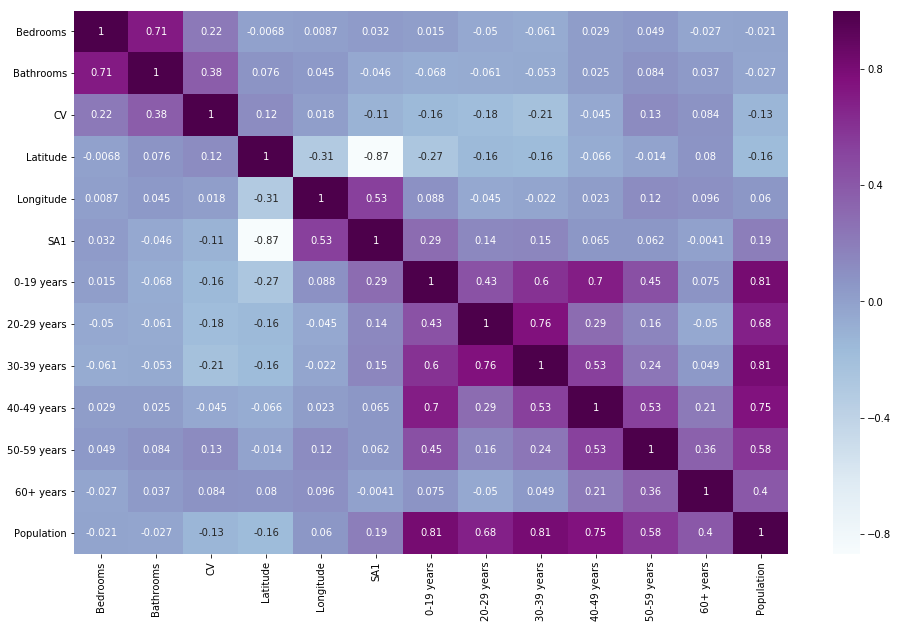

In [1278]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="BuPu")
plt.show()

1. Remove any uneccessary columns for predicting and get rid of the rows with NaN values
2. Split into 80:20 test split since there are 5 sample rows
3. Fit the model
4. With the model, score the test set and check how close it is to the actual value
5. Use the prediction to estimate the value for the NaN values

In [1279]:
hob_df = hob.drop(['Address', 'Latitude', 'Longitude', 'SA1', 'Land area', '0-19 years','20-29 years', '30-39 years', '40-49 years', '50-59 years', '60+ years', 'Suburbs', 'Population'], axis = 1)
hob_df

,Bedrooms,Bathrooms,CV
223,4,2.0,860000
309,4,NaN,1250000
310,4,2.0,530000
311,4,NaN,1100000
449,5,4.0,545000
460,4,2.0,1125000
666,3,2.0,920000


In [1280]:
notnans = hob_df.notnull().all(axis = 1)
df_notnans = hob_df[notnans]
df_notnans

,Bedrooms,Bathrooms,CV
223,4,2.0,860000
310,4,2.0,530000
449,5,4.0,545000
460,4,2.0,1125000
666,3,2.0,920000


In [1281]:
from sklearn.model_selection import train_test_split
x = df_notnans.drop(['Bathrooms'], axis = 1)
y = df_notnans['Bathrooms']

train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8,random_state=4)

In [1282]:
from sklearn.model_selection import train_test_split
x = df_notnans.drop(['Bathrooms'], axis = 1)
y = df_notnans['Bathrooms']

train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8,random_state=4)

In [1283]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=30, random_state=6)
model.fit(train_x, train_y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=6, verbose=0, warm_start=False)

In [1284]:
score = model.score(test_x, test_y)
print("The prediction score on the test data is {:.2f}%".format(score*100))

The prediction score on the test data is 100.00%


In [1285]:
df_nans = hob_df.loc[~notnans]
df_nans['Bathrooms'] = model.predict(df_nans[['Bedrooms', 'CV']])
df_nans


,Bedrooms,Bathrooms,CV
309,4,2.0,1250000
311,4,2.0,1100000


In [1286]:
dataframe.loc[dataframe.isnull().values.any(axis=1), 'Bathrooms'] = model.predict(df_nans[['Bedrooms','CV']])
dataframe.isnull().sum()

Bedrooms       0
Bathrooms      0
Address        0
Land area      0
CV             0
Latitude       0
Longitude      0
SA1            0
0-19 years     0
20-29 years    0
30-39 years    0
40-49 years    0
50-59 years    0
60+ years      0
Suburbs        0
Population     0
NZDep2018      0
dtype: int64

In [1287]:
#Now we can see that no more null values remain in the dataframe.
dataframe.isnull().values.any()

False

Do data anlysis on the variables before choosing a model to predict with.

We can use the seaborn plots to visualise the data and their relationships while also checking for any outliers or improbable values within the dataframe.

In [1288]:
dataframe.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Population,NZDep2018
count,1051.000000,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,3.777355,2.073264,856.989534,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609,179.914367,5.063749
std,1.169412,0.992044,1588.156219,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031,71.059280,2.913471
min,1.000000,1.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,3.000000,1.000000,321.000000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000
50%,4.000000,2.000000,571.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,5.000000
75%,4.000000,3.000000,825.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,210.000000,8.000000
max,17.000000,8.000000,22240.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,10.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa158072e8>,
      dtype=object)

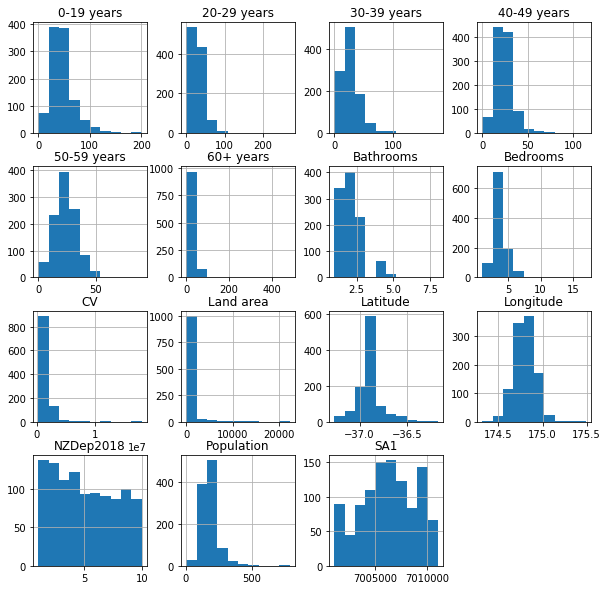

In [1289]:
dataframe.hist(figsize=(10,10))

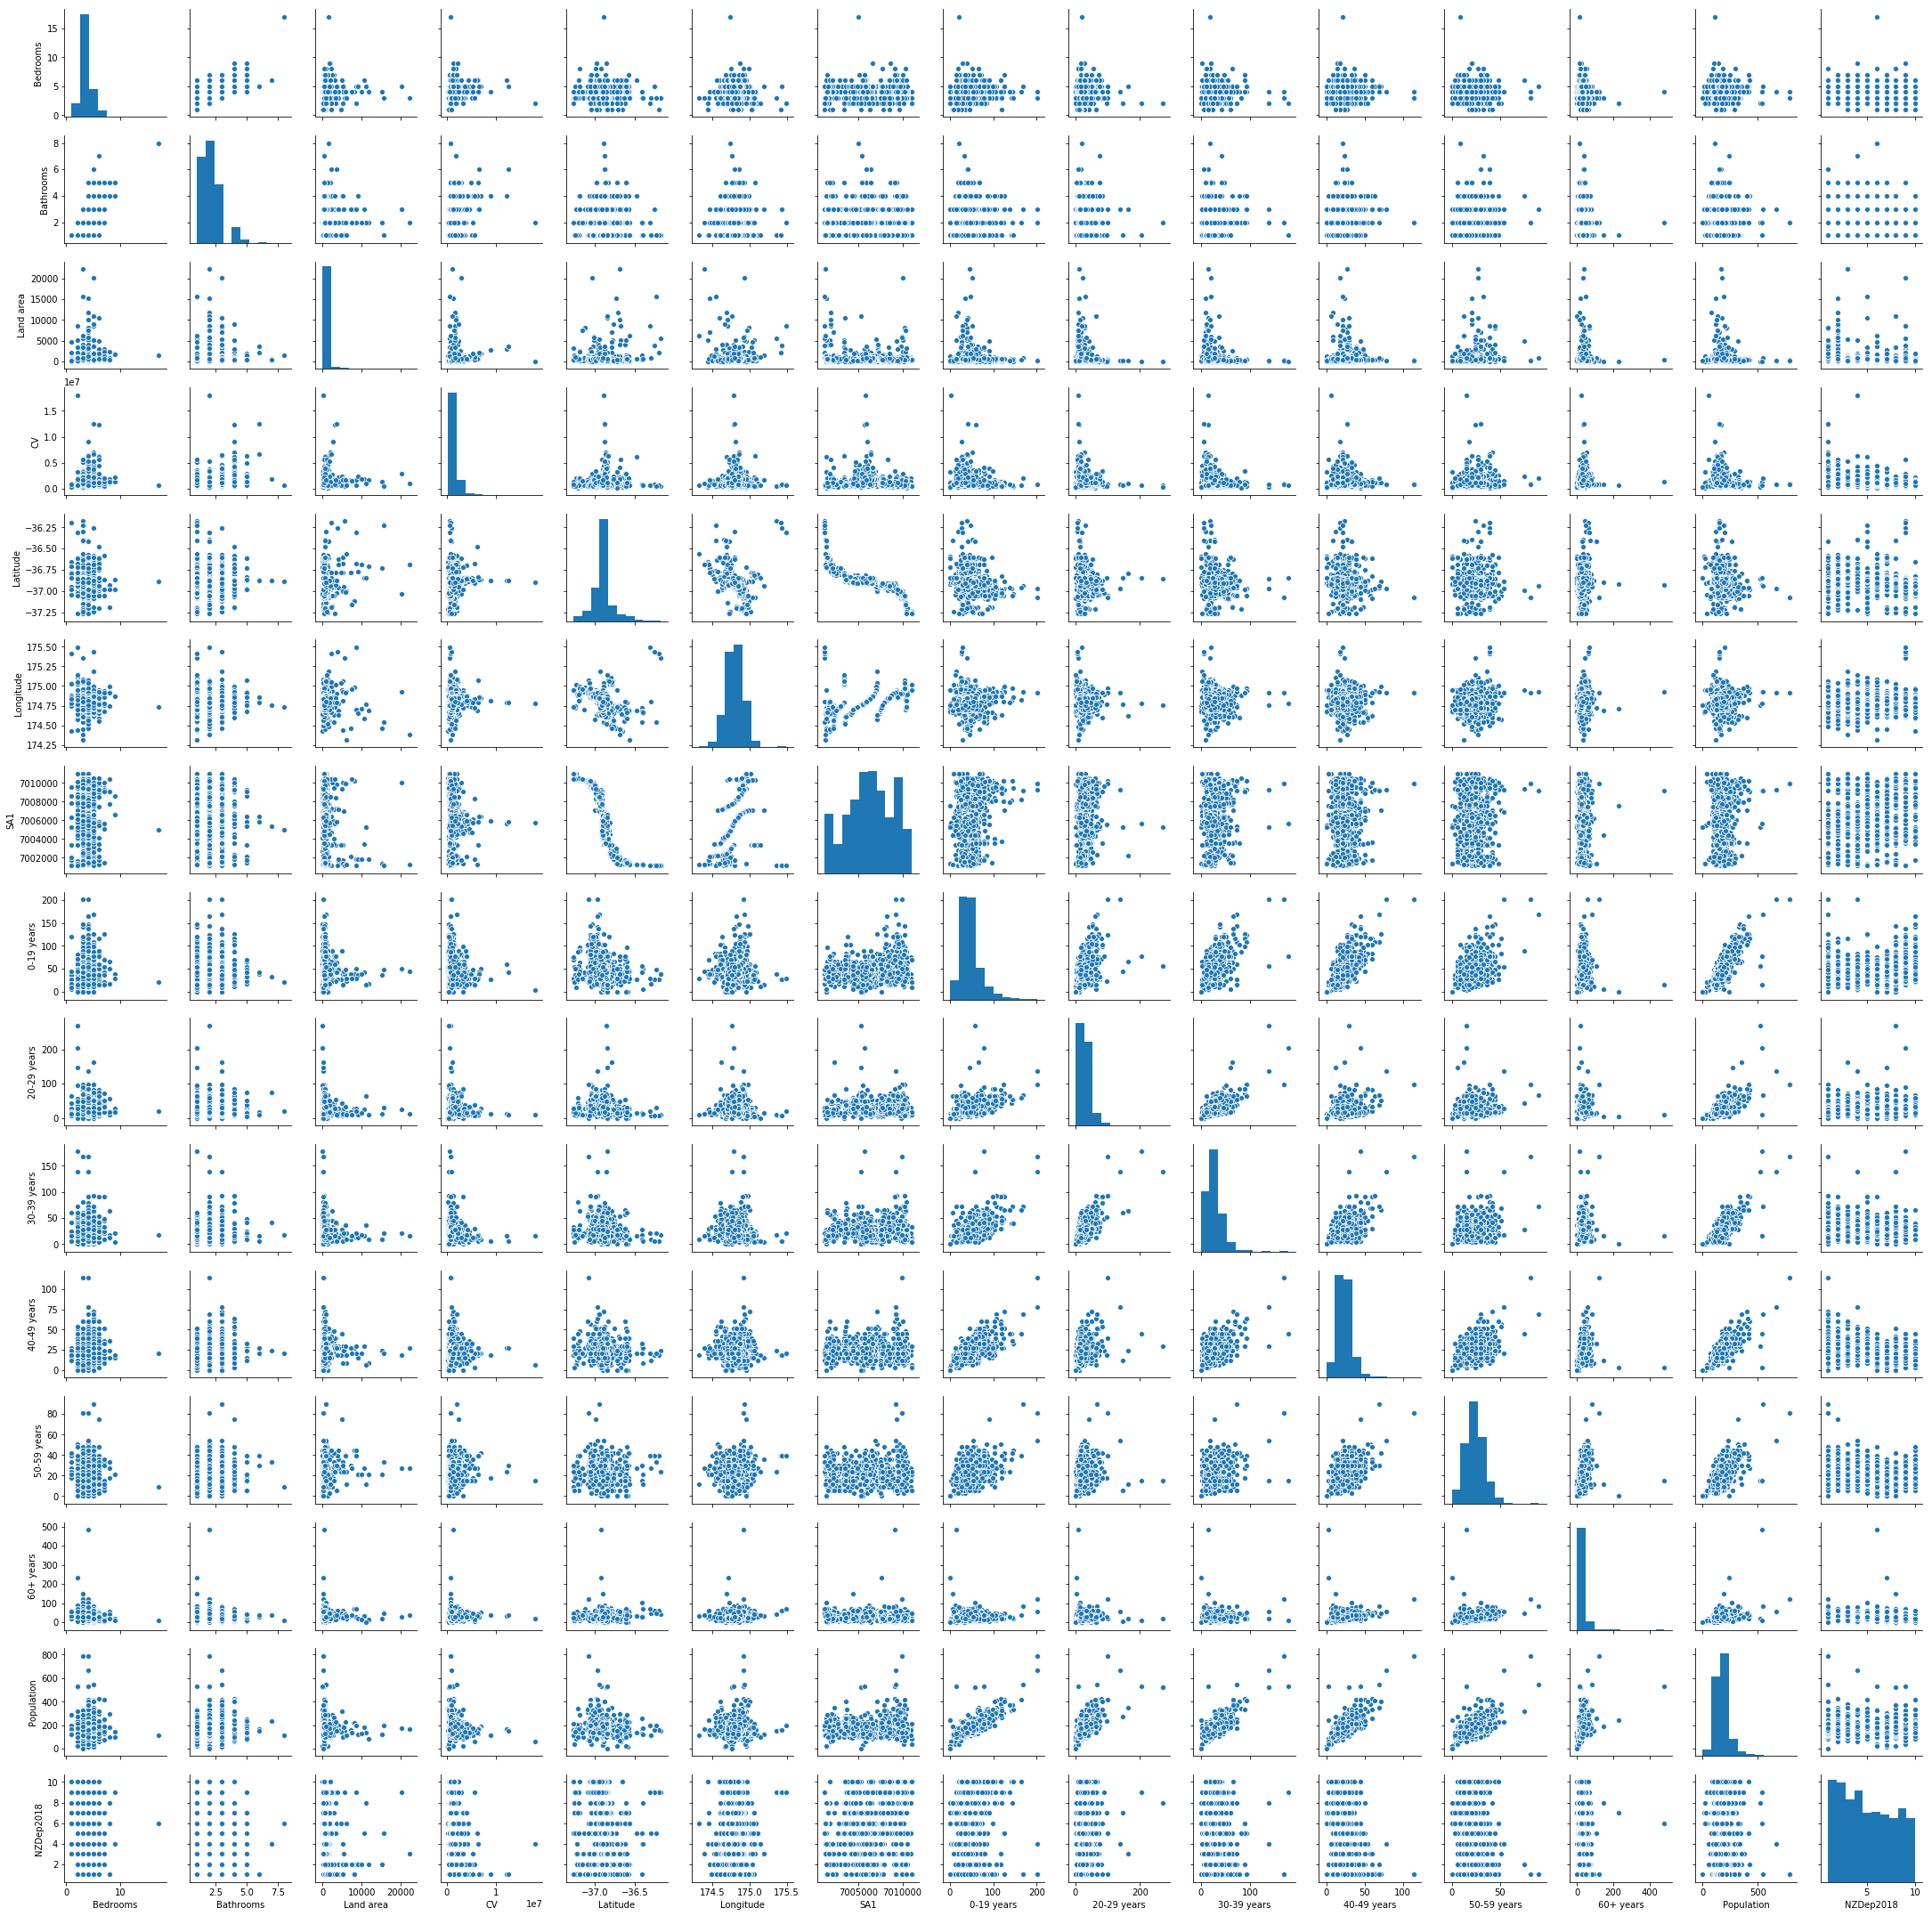

In [1290]:
sns.pairplot(dataframe, height = 2.0)

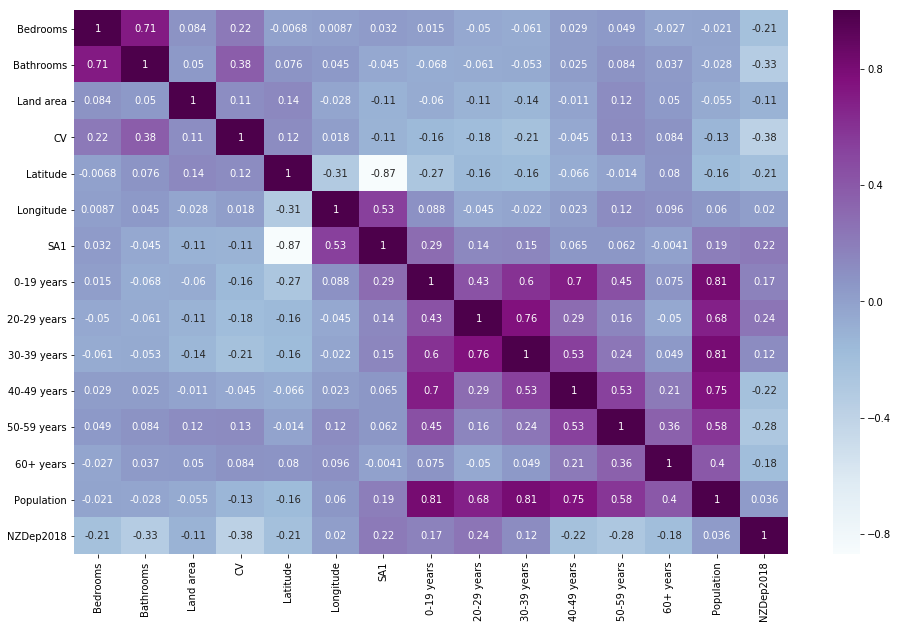

In [1291]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = dataframe.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="BuPu")
plt.show()

When we check for duplicated cells, we can see that their are 8 of them within the dataframe so we drop them and verify that 8 rows have been removed.

In [1292]:
dataframe.duplicated().sum()

8

In [1293]:
dataframe.shape

(1051, 17)

In [1294]:
doubles = dataframe[dataframe.duplicated(keep = False)]
doubles

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,NZDep2018
63,4,2.0,"46 Waiatarua Road Remuera, Auckland",1031,2450000,-36.876212,174.819975,7006075,54,12,27,30,24,45,Remuera,189,3.0
64,4,2.0,"46 Waiatarua Road Remuera, Auckland",1031,2450000,-36.876212,174.819975,7006075,54,12,27,30,24,45,Remuera,189,3.0
179,3,1.0,"8 Justamere Place Weymouth, Auckland",600,530000,-37.042510,174.867389,7009515,78,33,39,24,30,24,Weymouth,225,10.0
180,3,1.0,"8 Justamere Place Weymouth, Auckland",600,530000,-37.042510,174.867389,7009515,78,33,39,24,30,24,Weymouth,225,10.0
183,4,4.0,"9 Darwin Lane Remuera, Auckland",2718,9000000,-36.871836,174.813689,7005974,27,12,6,18,18,36,Remuera,114,1.0
184,4,4.0,"9 Darwin Lane Remuera, Auckland",2718,9000000,-36.871836,174.813689,7005974,27,12,6,18,18,36,Remuera,114,1.0
200,3,2.0,"16 Percy Winstone Lane Stonefields, Auckland",261,1240000,-36.889431,174.834219,7006345,66,48,54,33,39,39,Stonefields,273,1.0
201,3,2.0,"16 Percy Winstone Lane Stonefields, Auckland",261,1240000,-36.889431,174.834219,7006345,66,48,54,33,39,39,Stonefields,273,1.0
243,3,2.0,"11 Marie Costello Way Beach Haven, Auckland",400,940000,-36.788752,174.692661,7002422,60,18,42,39,24,33,Beach Haven,210,4.0
244,3,2.0,"11 Marie Costello Way Beach Haven, Auckland",400,940000,-36.788752,174.692661,7002422,60,18,42,39,24,33,Beach Haven,210,4.0


In [1295]:
dataframe.drop_duplicates(keep = 'first', inplace =True)

In [1296]:
dataframe.shape

(1043, 17)

Check for any outliers or improbable values in the dataframe and remove them.

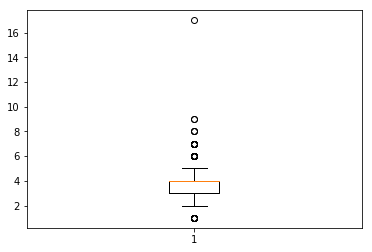

In [1297]:
plt.boxplot(dataframe['Bedrooms'])
plt.show()

In [1298]:
dataframe.iloc[np.where(dataframe['Bedrooms']>10)[0][:]]

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,NZDep2018
611,17,8.0,"Sandringham Auckland City 1025 Sandringham, ...",1596,760000,-36.883613,174.738889,7004981,21,21,18,21,9,12,Sandringham,111,6.0


In [1299]:
dataframe = dataframe.drop(dataframe.index[[611]])

In [1300]:
#one less row so we know that the row has been dropped
dataframe.shape

(1042, 17)

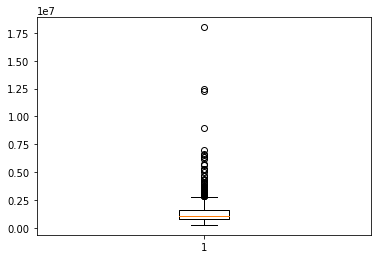

In [1301]:
plt.boxplot(dataframe['CV'])
plt.show()

In [1302]:
#Observations of CV above 5 million
dataframe.iloc[np.where(dataframe['CV']>5000000)[0][:]]

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,NZDep2018
183,4,4.0,"9 Darwin Lane Remuera, Auckland",2718,9000000,-36.871836,174.813689,7005974,27,12,6,18,18,36,Remuera,114,1.0
266,6,3.0,"34d Arney Crescent Remuera, Auckland",602,6400000,-36.869937,174.788921,7005846,36,6,6,18,21,30,Remuera,129,1.0
306,2,2.0,"223 Green Lane West Epsom, Auckland",123,18000000,-36.892772,174.779791,7005755,3,9,15,6,15,21,Epsom,60,4.0
421,5,4.0,"15 Lammermoore Drive St Heliers, Auckland",1998,7000000,-36.863985,174.851967,7006417,51,27,9,21,42,51,St Heliers,192,1.0
441,4,3.0,"7-9 Glen Atkinson Street St Heliers, Auckland",1750,6500000,-36.866175,174.849780,7006420,42,21,12,21,39,39,St Heliers,174,1.0
481,4,4.0,"10 Codrington Crescent Mission Bay, Auckland",827,5300000,-36.853009,174.829543,7006171,18,18,9,15,18,36,Mission Bay,111,3.0
520,3,1.0,"42 Clifton Road Herne Bay, Auckland",1292,5200000,-36.845550,174.729659,7004702,45,9,12,33,30,24,Herne Bay,159,2.0
572,5,6.0,"259 St Heliers Bay Road St Heliers, Auckland",2268,6600000,-36.863925,174.853299,7006423,39,18,15,21,39,30,St Heliers,165,1.0
582,4,5.0,"379a Gordons Road Waiheke Island, Auckland",641,6400000,-36.829057,175.074283,7003389,30,9,18,27,39,42,Waiheke Island,168,4.0
591,6,4.0,"410 Pukapuka Road Mahurangi, Auckland",607,6200000,-36.474573,174.693415,7001299,27,15,15,21,27,33,Pohuehue,135,5.0


In [1303]:
dataframe = dataframe.drop(dataframe.index[[306]])

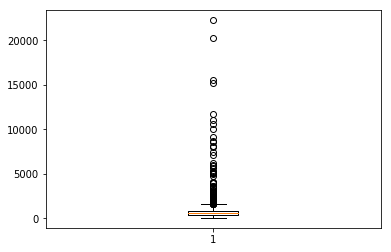

In [1304]:
plt.boxplot(dataframe['Land area'])
plt.show()

In [1305]:
#Self reasearch on the larger values showed that these values are correct and shouldnot be removed.
df.iloc[np.where(dataframe['Land area']>dataframe['Land area'].quantile(0.99))[0][:]]

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population
78,3,1.0,"68 Walters Road Mount Wellington, Auckland",688,780000,-36.931371,174.847528,7008343,51,57,42,27,30,39,Mount Wellington,234
224,3,1.0,"268 Jervois Road Herne Bay, Auckland",473,2275000,-36.847403,174.732414,7004901,57,21,15,30,15,18,Herne Bay,153
483,4,3.0,"42 Marua Road Ellerslie, Auckland",277,1725000,-36.889853,174.816459,7006118,48,33,48,30,18,27,Ellerslie,204
512,1,1.0,"108 Hill Road Palm Beach, Auckland",4737,710000,-36.785245,175.041992,7003365,27,9,18,18,24,48,Palm Beach,144
545,4,2.0,"52 Polo Prince Drive Alfriston, Auckland",6024,1575000,-37.006120,174.927681,7009943,24,15,21,9,24,21,Totara Park,117
558,2,1.0,"38 Hamon Avenue Mount Roskill, Auckland",754,1300000,-36.902073,174.750793,7005243,57,33,39,24,15,18,Mount Roskill,186
626,4,2.0,"165 Mill Road Bombay, Auckland",230,2050000,-37.192545,174.975713,7010369,45,21,12,21,39,21,Bombay,153
632,3,2.0,"2/29 Jane Cowie Avenue Otahuhu, Auckland",57,530000,-36.956313,174.845796,7008385,66,42,39,15,12,12,Otahuhu,189
647,5,3.0,"10 Nanleen Rise The Gardens, Auckland",411,500000,-37.015299,174.910650,7009853,33,18,27,18,24,39,Manurewa,165
653,6,2.0,"78 Helvetia Road Pukekohe, Auckland",741,620000,-37.197497,174.889734,7010481,57,36,15,18,6,18,Pukekohe,153


In [1306]:
#Create a copy of the dataframe to use later on and compare the data after transforming.
copy_df = dataframe.copy()
copy_df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0


In [1307]:
dataframe.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Population,NZDep2018
count,1041.000000,1041.000000,1041.000000,1.041000e+03,1041.000000,1041.000000,1.041000e+03,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000
mean,3.780019,2.071085,851.775216,1.380868e+06,-36.893405,174.799191,7.006316e+06,47.533141,28.976945,27.000000,24.118156,22.596542,29.322767,179.841499,5.066282
std,1.173679,0.992636,1580.893583,1.163590e+06,0.130233,0.119799,2.590188e+03,24.759752,21.069104,17.986533,10.975255,10.232515,21.889793,71.231238,2.907290
min,1.000000,1.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,3.000000,1.000000,323.000000,7.800000e+05,-36.950408,174.720076,7.004415e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000
50%,4.000000,2.000000,571.000000,1.080000e+06,-36.893368,174.797892,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,5.000000
75%,4.000000,3.000000,825.000000,1.600000e+06,-36.855774,174.880945,7.008382e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,207.000000,8.000000
max,17.000000,8.000000,22240.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,10.000000


From the plots we can see that the data is very skewed so we need to transofrm the columns of data and make them normal and the distribution symetric which is better for any analysis.

We have used the boxcox transofrmation over the logarithmic transofrmation for most of the columns since it is a better fit for data with a lot of variability and have compared the resulting distributions with the skewness and plots. 

In [1308]:
#log transform the CV column to reduce the skewness of the data and make the distribution closer to normal.
dataframe['CV'] = np.log(dataframe['CV'])

In [1309]:
#This loop will use the boxcox transform on the specified columns in the dataframe
# delta is an infinitesimally small number for the '0' values since the boxcox transformation can only deal with positive numbers and will make minimal change to the data.

#delta = 0.0000000001
from scipy.stats import boxcox
for column in dataframe[['Bedrooms','Bathrooms', 'Land area', '0-19 years', '20-29 years', '30-39 years', '40-49 years', '50-59 years', '60+ years', 'Population']]:
    
    data = dataframe[column] + delta
    transform = np.asarray(data.values)
    dataframe[column] = boxcox(transform)[0]
    print(dataframe[column].skew())
    

0.08189750289633418
-0.0033024083771244694
-0.015458050513022011
-0.37695639795889263
-0.0629960127498561
-0.20991405712528816
-0.3983844484638051
-0.5875333638316377
0.0028645490040256774
0.2961374548947231


In [1310]:
#loop to check the skewness of all the numerical columns
for column in dataframe[['Bedrooms', 'Bathrooms', 'Land area', 'CV', 'Latitude', 'Longitude', 'Population', '0-19 years', '20-29 years', '30-39 years', '40-49 years', '50-59 years', '60+ years', 'NZDep2018']]:
    
    print(dataframe[column].skew())

0.08189750289633418
-0.0033024083771244694
-0.015458050513022011
0.7095309546513419
0.9491224460454717
0.34910632132535013
0.2961374548947231
-0.37695639795889263
-0.0629960127498561
-0.20991405712528816
-0.3983844484638051
-0.5875333638316377
0.0028645490040256774
0.19526805660911475


Series of distribution plots of data columns that have been transformed and used in the final model to compare the changes. 

Text(0.5, 1.0, 'Log Transform')

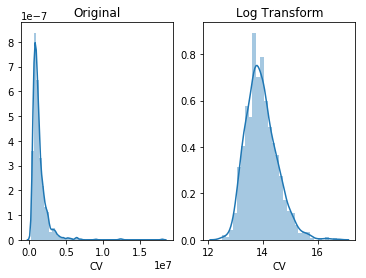

In [1311]:
fig, axs = plt.subplots(ncols=2)

sns.distplot(copy_df['CV'],ax=axs[0])

sns.distplot(dataframe['CV'],ax=axs[1])
axs[0].set_title("Original")
axs[1].set_title("Log Transform")


Text(0.5, 1.0, 'BoxCox Transform')

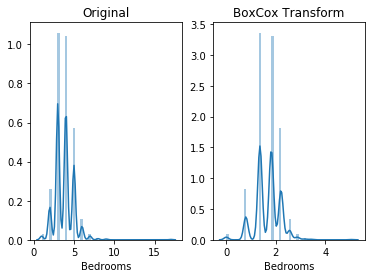

In [1312]:
fig, axs = plt.subplots(ncols=2)

sns.distplot(copy_df['Bedrooms'],ax=axs[0])

sns.distplot(dataframe['Bedrooms'],ax=axs[1])
axs[0].set_title("Original")
axs[1].set_title("BoxCox Transform")

Text(0.5, 1.0, 'BoxCox Transform')

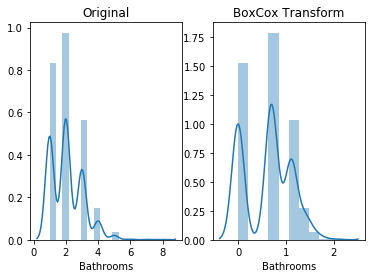

In [1313]:
fig, axs = plt.subplots(ncols=2)

sns.distplot(copy_df['Bathrooms'],ax=axs[0])

sns.distplot(dataframe['Bathrooms'],ax=axs[1])
axs[0].set_title("Original")
axs[1].set_title("BoxCox Transform")

Text(0.5, 1.0, 'BoxCox Transform')

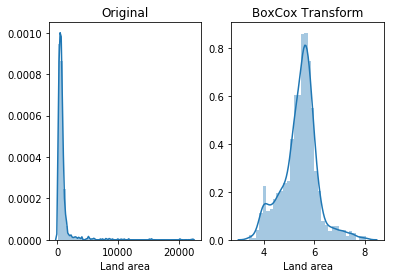

In [1314]:
fig, axs = plt.subplots(ncols=2)

sns.distplot(copy_df['Land area'],ax=axs[0])

sns.distplot(dataframe['Land area'],ax=axs[1])
axs[0].set_title("Original")
axs[1].set_title("BoxCox Transform")

Text(0.5, 1.0, 'BoxCox Transform')

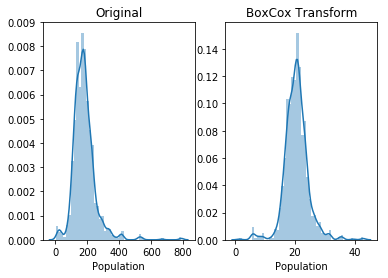

In [1315]:
fig, axs = plt.subplots(ncols=2)

sns.distplot(copy_df['Population'],ax=axs[0])

sns.distplot(dataframe['Population'],ax=axs[1])
axs[0].set_title("Original")
axs[1].set_title("BoxCox Transform")

Final heatmap of the transformed data since the relationships would have changed.

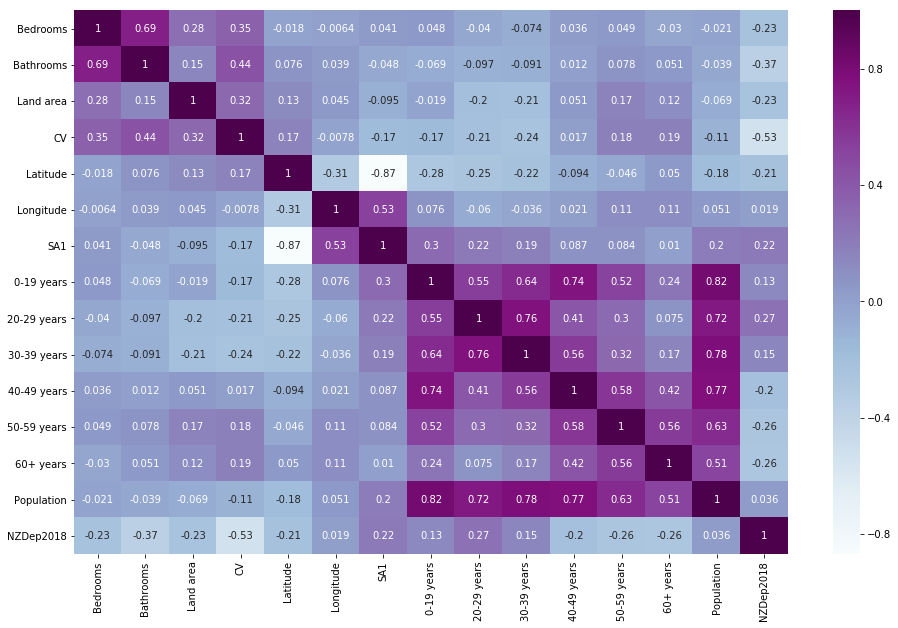

In [1316]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = dataframe.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="BuPu")
plt.show()

Model

The model chosen can only take in numeric data and the resulting columns yielded the best results, evaluated against the metrics.

First we separate the data into labels and its corresponding independent variables.

Then we use and 80:20 split into a training and testing set for evaulation of the Linear Regression Model.

In [1317]:
y = dataframe['CV']
x = dataframe.drop(['CV', 'Address', 'Suburbs', 'SA1', 'Longitude', '0-19 years', '20-29 years', '30-39 years', '40-49 years', '50-59 years', '60+ years'], axis = 1)
seed = 17

In [1318]:
y.head()

0    13.774689
1    14.038654
2    14.038654
3    13.514405
4    13.353475
Name: CV, dtype: float64

In [1319]:
x.head()

,Bedrooms,Bathrooms,Land area,Latitude,Population,NZDep2018
0,2.208410,1.110518e+00,5.686931,-37.012920,20.547372,6.0
1,2.208410,1.110518e+00,5.510635,-37.063672,17.669689,1.0
2,2.553120,1.405288e+00,5.588834,-37.063580,17.669689,1.0
3,0.791406,1.000000e-10,3.805080,-36.912996,17.030653,2.0
4,1.359013,1.000000e-10,5.558321,-36.979037,23.655302,9.0


In [1320]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state= seed)

In [1321]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [1322]:
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1323]:
predicted = model.predict(test_x)

RMSE is a good metric to evaluate the performance of the model since it is scaled down to match the data's units compared to just the regular MSE.
A lower RMSE indicates a smaller variation between the actual and predicted values.

The R^2 value from the score indicated that the model can account for 50% of the total variation between its prediction and the actual score.

In [1324]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_y, predicted))

0.3791195431206361

In [1325]:
model.score(test_x,test_y)

0.5057808406558222

Text(0.5, 1.0, 'Actual log(CV) vs Predicted log(CV)')

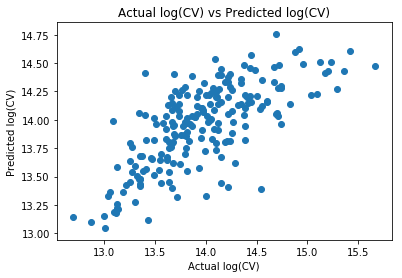

In [1326]:
plt.scatter(test_y,predicted)
plt.xlabel('Actual log(CV)')
plt.ylabel('Predicted log(CV)')
plt.title('Actual log(CV) vs Predicted log(CV)')